In [0]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [24]:
%cd /gdrive/My\ Drive/data

/gdrive/My Drive/data


In [0]:
data = pd.read_csv("ratings_Electronics.csv", header=None)

In [0]:
data.columns = ["userID", "itemID","rating", "timestamp"]

In [102]:
data.head()

,userID,itemID,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [0]:
data.shape

(7824482, 4)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
userId       object
productId    object
ratings      float64
timestamp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [0]:
data.describe()

,ratings,timestamp
count,7.824482e+06,7.824482e+06
mean,4.012337e+00,1.338178e+09
std,1.380910e+00,6.900426e+07
min,1.000000e+00,9.127296e+08
25%,3.000000e+00,1.315354e+09
50%,5.000000e+00,1.361059e+09
75%,5.000000e+00,1.386115e+09
max,5.000000e+00,1.406074e+09


In [0]:
# More than 50% of the products have been rated 5. 

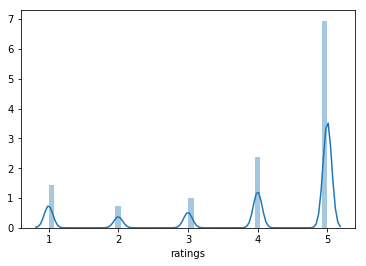

In [0]:
sns.distplot(data['rating'], hist = True)

In [0]:
userData = data.groupby(["userID"]).count().reset_index()

# 4201696 rows × 3 columns
# data.groupby("userId").count()


In [0]:
userData.shape

(4201696, 4)

In [0]:
users = userData.loc[userData['rating']>5]
users = users.loc[:,'userID']

In [0]:
temp_df = data[data['userID'].isin(users)]

In [0]:
# temp_df.groupby(['userId']).count()

In [33]:
temp_df.shape

(1904153, 4)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
train_data, test_data = train_test_split(temp_df, test_size = 0.30, random_state=7)

In [36]:
train_data.shape

(1332907, 4)

In [108]:
productGroup = temp_df.groupby('itemID')[['rating']].sum()
productGroup.sort_values(['rating'], ascending = [0]).head()

,rating
itemID,
B007WTAJTO,20953.0
B003ES5ZUU,18042.0
B0019EHU8G,15237.0
B00DR0PDNE,13731.0
B002WE6D44,12016.0


In [0]:
# Popularity based recommendations.
def create(train_data):
    train_data_grouped = train_data.groupby(['itemID']).agg({'userID': 'count'}).reset_index()
    train_data_grouped.rename(columns = {'userID': 'score'},inplace=True)
    train_data_sort = train_data_grouped.sort_values(['score', 'itemID'], ascending = [0,1])
    train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first')
    return train_data_sort.head(10)

In [0]:
def recommend(popularity_recommendations, user_id):    
    user_recommendations = popularity_recommendations
        
    #Add user_id column for which the recommendations are being generated
    user_recommendations['user_id'] = user_id

    #Bring user_id column to the front
    cols = user_recommendations.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    user_recommendations = user_recommendations[cols]

    return user_recommendations

In [0]:
popularity_recommendations = create(train_data)

In [0]:
recommendations = recommend(popularity_recommendations, 'A000715434M800HLCENK9')

In [113]:
recommendations

,user_id,itemID,score,Rank
161412,A000715434M800HLCENK9,B007WTAJTO,3159,1.0
94200,A000715434M800HLCENK9,B003ES5ZUU,2664,2.0
202201,A000715434M800HLCENK9,B00DR0PDNE,2380,3.0
55610,A000715434M800HLCENK9,B0019EHU8G,2189,4.0
84287,A000715434M800HLCENK9,B002WE6D44,1794,5.0
94097,A000715434M800HLCENK9,B003ELYQGG,1659,6.0
16625,A000715434M800HLCENK9,B0002L5R78,1645,7.0
180581,A000715434M800HLCENK9,B009SYZ8OC,1605,8.0
191536,A000715434M800HLCENK9,B00BGGDVOO,1380,9.0
83728,A000715434M800HLCENK9,B002V88HFE,1370,10.0


In [0]:
train_data_subset = train_data.iloc[1:50000]

In [0]:
class item_similarity_recommender_py():
    def __init__(self):
        self.train_data = None
        self.user_id = None
        self.item_id = None
        self.cooccurence_matrix = None
        self.item_similarity_recommendations = None
        
    #Get unique items corresponding to a given user
    def get_user_items(self, user):
        user_data = self.train_data[self.train_data[self.user_id] == user]
        user_items = list(user_data[self.item_id].unique())
        
        return user_items
        
    #Get unique users for a given item
    def get_item_users(self, item):
        item_data = self.train_data[self.train_data[self.item_id] == item]
        item_users = set(item_data[self.user_id].unique())
            
        return item_users
        
    #Get unique items in the training data
    def get_all_items_train_data(self):
        all_items = list(self.train_data[self.item_id].unique())
            
        return all_items
        
    #Construct cooccurence matrix
    def construct_cooccurence_matrix(self, user_products, all_products):
            
        user_products_users = []        
        for i in range(0, len(user_products)):
            user_products_users.append(self.get_item_users(user_products[i]))
            
        ###############################################
        #Initialize the item cooccurence matrix of size 
        #len(user_products) X len(products)
        ###############################################
        cooccurence_matrix = np.matrix(np.zeros(shape=(len(user_products), len(all_products))), float)
           
        #############################################################
        #Calculate similarity between user songs and all unique songs
        #in the training data
        #############################################################
        for i in range(0,len(all_products)):
            #Calculate unique users of products (item) i
            products_i_data = self.train_data[self.train_data[self.item_id] == all_products[i]]
            users_i = set(products_i_data[self.user_id].unique())
            
            for j in range(0,len(user_products)):       
                    
                users_j = user_products_users[j]
                users_intersection = users_i.intersection(users_j)
                
                #Calculate cooccurence_matrix[i,j] as Jaccard Index
                if len(users_intersection) != 0:
                    #Calculate union of listeners of songs i and j
                    users_union = users_i.union(users_j)
                    
                    cooccurence_matrix[j,i] = float(len(users_intersection))/float(len(users_union))
                else:
                    cooccurence_matrix[j,i] = 0
                    
        
        return cooccurence_matrix

    
    #Use the cooccurence matrix to make top recommendations
    def generate_top_recommendations(self, user, cooccurence_matrix, all_products, user_products):
        print("Non zero values in cooccurence_matrix :%d" % np.count_nonzero(cooccurence_matrix))
        
        #Calculate a weighted average of the scores in cooccurence matrix for all user products.
        user_sim_scores = cooccurence_matrix.sum(axis=0)/float(cooccurence_matrix.shape[0])
        user_sim_scores = np.array(user_sim_scores)[0].tolist()
 
        #Sort the indices of user_sim_scores based upon their value
        #Also maintain the corresponding score
        sort_index = sorted(((e,i) for i,e in enumerate(list(user_sim_scores))), reverse=True)
    
        #Create a dataframe from the following
        columns = ['userId', 'productId', 'score', 'rank']
        #index = np.arange(1) # array of numbers for the number of samples
        df = pd.DataFrame(columns=columns)
         
        #Fill the dataframe with top 10 item based recommendations
        rank = 1 
        for i in range(0,len(sort_index)):
            if ~np.isnan(sort_index[i][0]) and all_products[sort_index[i][1]] not in user_products and rank <= 10:
                df.loc[len(df)]=[user,all_products[sort_index[i][1]],sort_index[i][0],rank]
                rank = rank+1
        
        #Handle the case where there are no recommendations
        if df.shape[0] == 0:
            print("The current user has no products for training the item similarity based recommendation model.")
            return -1
        else:
            return df
 
    #Create the item similarity based recommender system model
    def create(self, train_data, user_id, item_id):
        self.train_data = train_data
        self.user_id = user_id
        self.item_id = item_id

    #Use the item similarity based recommender system model to
    #make recommendations
    def recommend(self, user):
        
        ########################################
        #A. Get all unique products for this user
        ########################################
        user_products = self.get_user_items(user)    
            
        print("No. of unique products for the user: %d" % len(user_products))
        
        ######################################################
        #B. Get all unique items (products) in the training data
        ######################################################
        all_products = self.get_all_items_train_data()
        
        print("no. of unique products in the training set: %d" % len(all_products))
         
        ###############################################
        #C. Construct item cooccurence matrix of size 
        #len(user_products) X len(products)
        ###############################################
        cooccurence_matrix = self.construct_cooccurence_matrix(user_products, all_products)
        
        #######################################################
        #D. Use the cooccurence matrix to make recommendations
        #######################################################
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_products, user_products)
                
        return df_recommendations
    
    #Get similar items to given items
    def get_similar_items(self, item_list):
        
        user_products = item_list
        
        ######################################################
        #B. Get all unique items in the training data
        ######################################################
        all_products = self.get_all_items_train_data()
        
        print("no. of unique products in the training set: %d" % len(all_products))
         
        ###############################################
        #C. Construct item cooccurence matrix of size 
        #len(user_products) X len(products)
        ###############################################
        cooccurence_matrix = self.construct_cooccurence_matrix(user_products, all_products)
        
        #######################################################
        #D. Use the cooccurence matrix to make recommendations
        #######################################################
        user = ""
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_products, user_products)
         
        return df_recommendations

In [0]:
is_model = item_similarity_recommender_py()
is_model.create(train_data_subset, 'userID', 'itemID')

In [117]:
train_data_subset.head()

,userID,itemID,rating,timestamp
6512814,A1UEPQTQMKS52C,B0097BEECI,5.0,1370044800
2281685,A1VDK3E3HBWUCF,B001SEL326,5.0,1398211200
7629310,A3CW41T1M0N5KC,B00FF2NDW0,5.0,1400198400
6075366,A3M9ABRW2VB84J,B0085HHKMG,5.0,1357171200
1357719,AXVVWAQT72TTY,B000SLNNG4,5.0,1206835200


In [118]:
!pip install scikit-surprise
from surprise import SVD

In [0]:
# from surprise.model_selection import cross_validate

In [0]:
# algo = SVD()
# cross_validate(algo, train_data_subset, measures=['RMSE', 'MAE'], cv=5, verbose=True)

In [91]:
# user_id = 'A0284208PB0CNSHI1OC6'
user_id = 'A1UEPQTQMKS52C'
user_items = is_model.get_user_items(user_id)
#
print("------------------------------------------------------------------------------------")
print("Training data for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend songs for the user using personalized model
is_model.recommend(user_id)

------------------------------------------------------------------------------------
Training data for the user userid: A1UEPQTQMKS52C:
------------------------------------------------------------------------------------
B0097BEECI
----------------------------------------------------------------------
Recommendation process going on:
----------------------------------------------------------------------
No. of unique products for the user: 1
no. of unique products in the training set: 29196
Non zero values in cooccurence_matrix :3


,userId,productId,score,rank
0,A1UEPQTQMKS52C,B0001M4E72,0.125000,1
1,A1UEPQTQMKS52C,B000F28DP2,0.058824,2
2,A1UEPQTQMKS52C,B001I45TAI,0.000000,3
3,A1UEPQTQMKS52C,B008ALMITM,0.000000,4
4,A1UEPQTQMKS52C,B0087EVHN0,0.000000,5
5,A1UEPQTQMKS52C,B0020HRCHU,0.000000,6
6,A1UEPQTQMKS52C,B004PYDE1E,0.000000,7
7,A1UEPQTQMKS52C,B003DW0GO2,0.000000,8
8,A1UEPQTQMKS52C,B000117DF8,0.000000,9
9,A1UEPQTQMKS52C,B00CG2EHY0,0.000000,10


In [0]:
from surprise import Dataset
from surprise import Reader
from surprise import accuracy

In [0]:
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data_df = Dataset.load_from_df(data[['userID', 'itemID', 'rating']], reader)

In [0]:
data_new = data_df

In [0]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data_new, test_size=.30)

In [0]:
from surprise import AlgoBase


In [0]:
class popularity_recommender_py(AlgoBase):
    def __init__(self):
        self.train_data = None
        self.user_id = None
        self.item_id = None
        self.popularity_recommendations = None
        AlgoBase.__init__(self)
        
    #Create the popularity based recommender system model
    def fit(self, train_data, user_id, item_id):
      AlgoBase.fit(self, train_data)
      train_data_grouped = train_data.groupby(['itemID']).agg({'userID': 'count'}).reset_index()
      train_data_grouped.rename(columns = {'userID': 'score'},inplace=True)
      train_data_sort = train_data_grouped.sort_values(['score', 'itemID'], ascending = [0,1])
      train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first')
      self.popularity_recommendations = train_data_sort.head(10)

    #Use the popularity based recommender system model to
    #make recommendations
    def estimate(self, user_id):    
      user_recommendations = self.popularity_recommendations

      #Add user_id column for which the recommendations are being generated
      user_recommendations['user_id'] = user_id

      #Bring user_id column to the front
      cols = user_recommendations.columns.tolist()
      cols = cols[-1:] + cols[:-1]
      user_recommendations = user_recommendations[cols]

      return user_recommendations


In [0]:
pm = popularity_recommender_py()
pm.fit(train_data, 'userID', 'itemID')

In [0]:
predictions = pm.estimate('A000715434M800HLCENK9')